### Environment setup


In [1]:
pip install numpy pandas scikit-learn matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


### Import Libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


### Load Data Set

In [11]:
# Loading the dataset
df = pd.read_csv('Housing.csv')

# Displaying the first few rows of the dataset
df.head()



,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


###  Exploratory Data Analysis (EDA)

In [16]:
df = pd.get_dummies(df, drop_first=True)


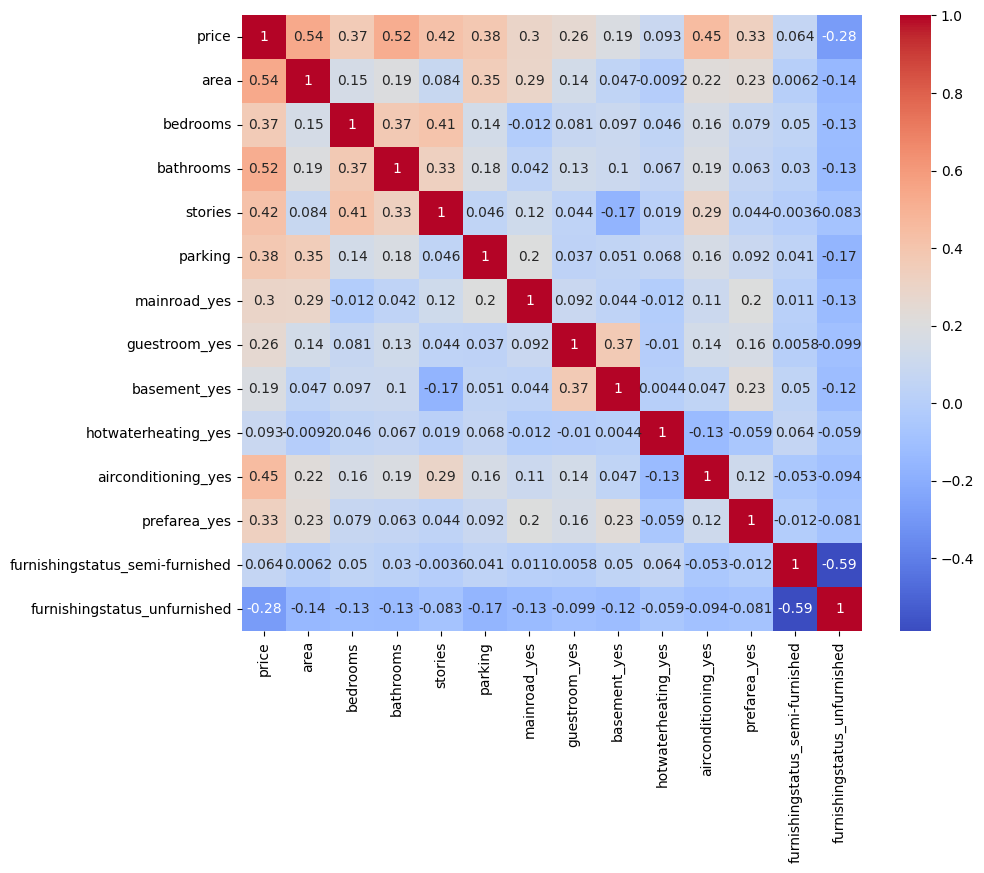

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


### Data PreProcessing

In [22]:
# Feature (X) and target (y)
X = df.drop('price', axis=1)  # Features
y = df['price']  # Target (house price)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of training and testing sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(436, 13) (109, 13) (436,) (109,)


### Model Training

#### a)Linear Regression

In [23]:
# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluation
print("Linear Regression R²:", r2_score(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))


Linear Regression R²: 0.6529242642153184
MAE: 970043.4039201637
MSE: 1754318687330.6643


### b) Random Forest Regressor

In [24]:
# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Random Forest R²:", r2_score(y_test, y_pred_rf))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))


Random Forest R²: 0.611918531405699
MAE: 1021546.0353211008
MSE: 1961585044320.3433


### Model Evaluation

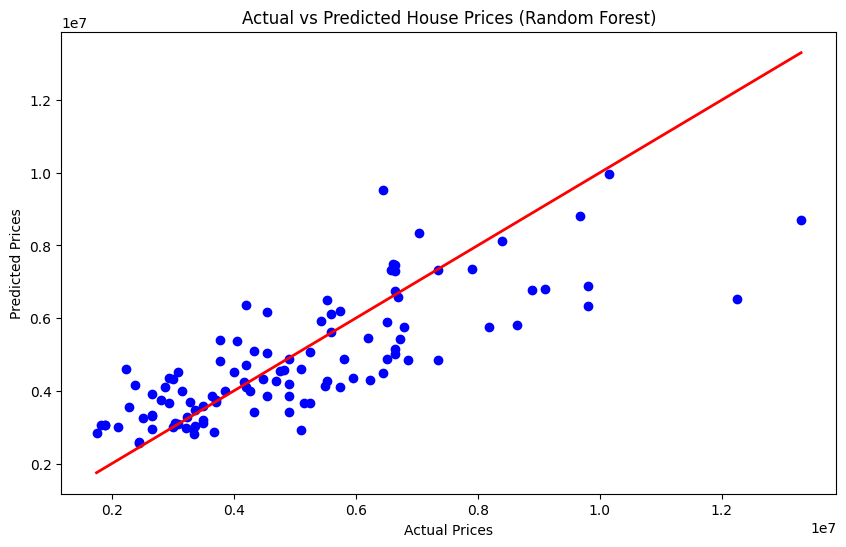

In [25]:
# Plot Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices (Random Forest)')
plt.show()


### Exploratory Data Analysis (EDA):

              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


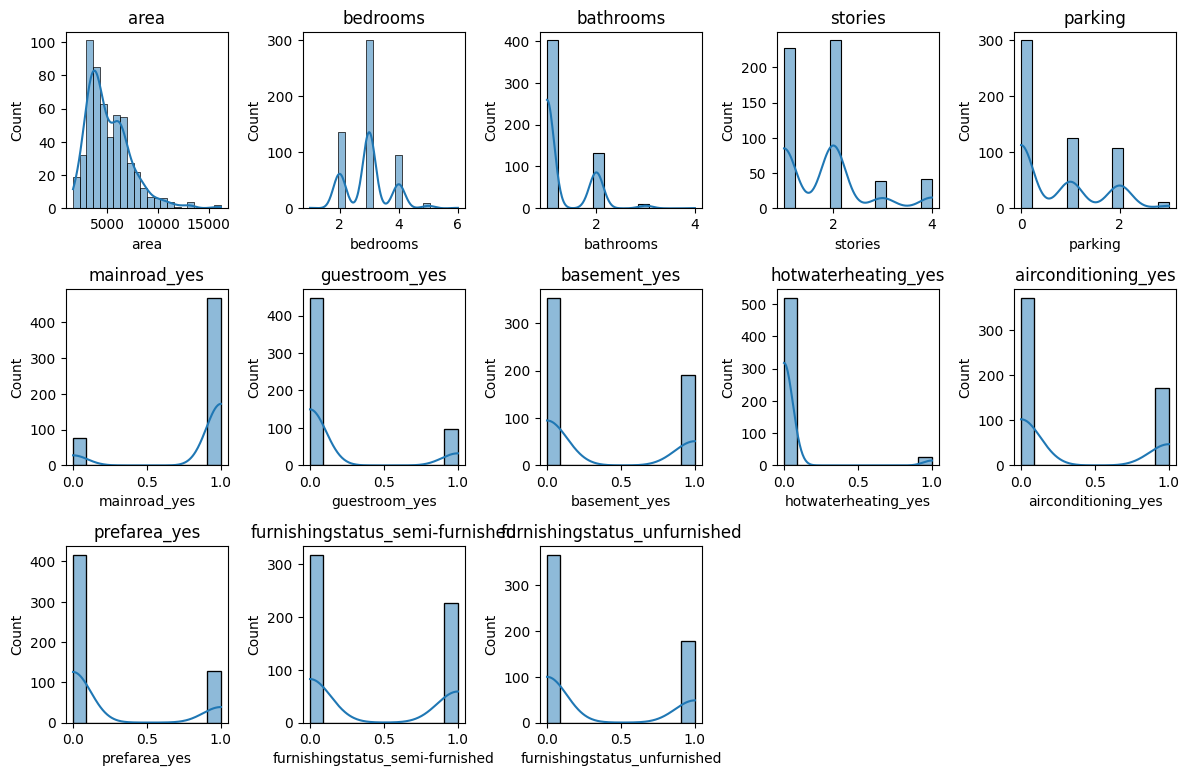

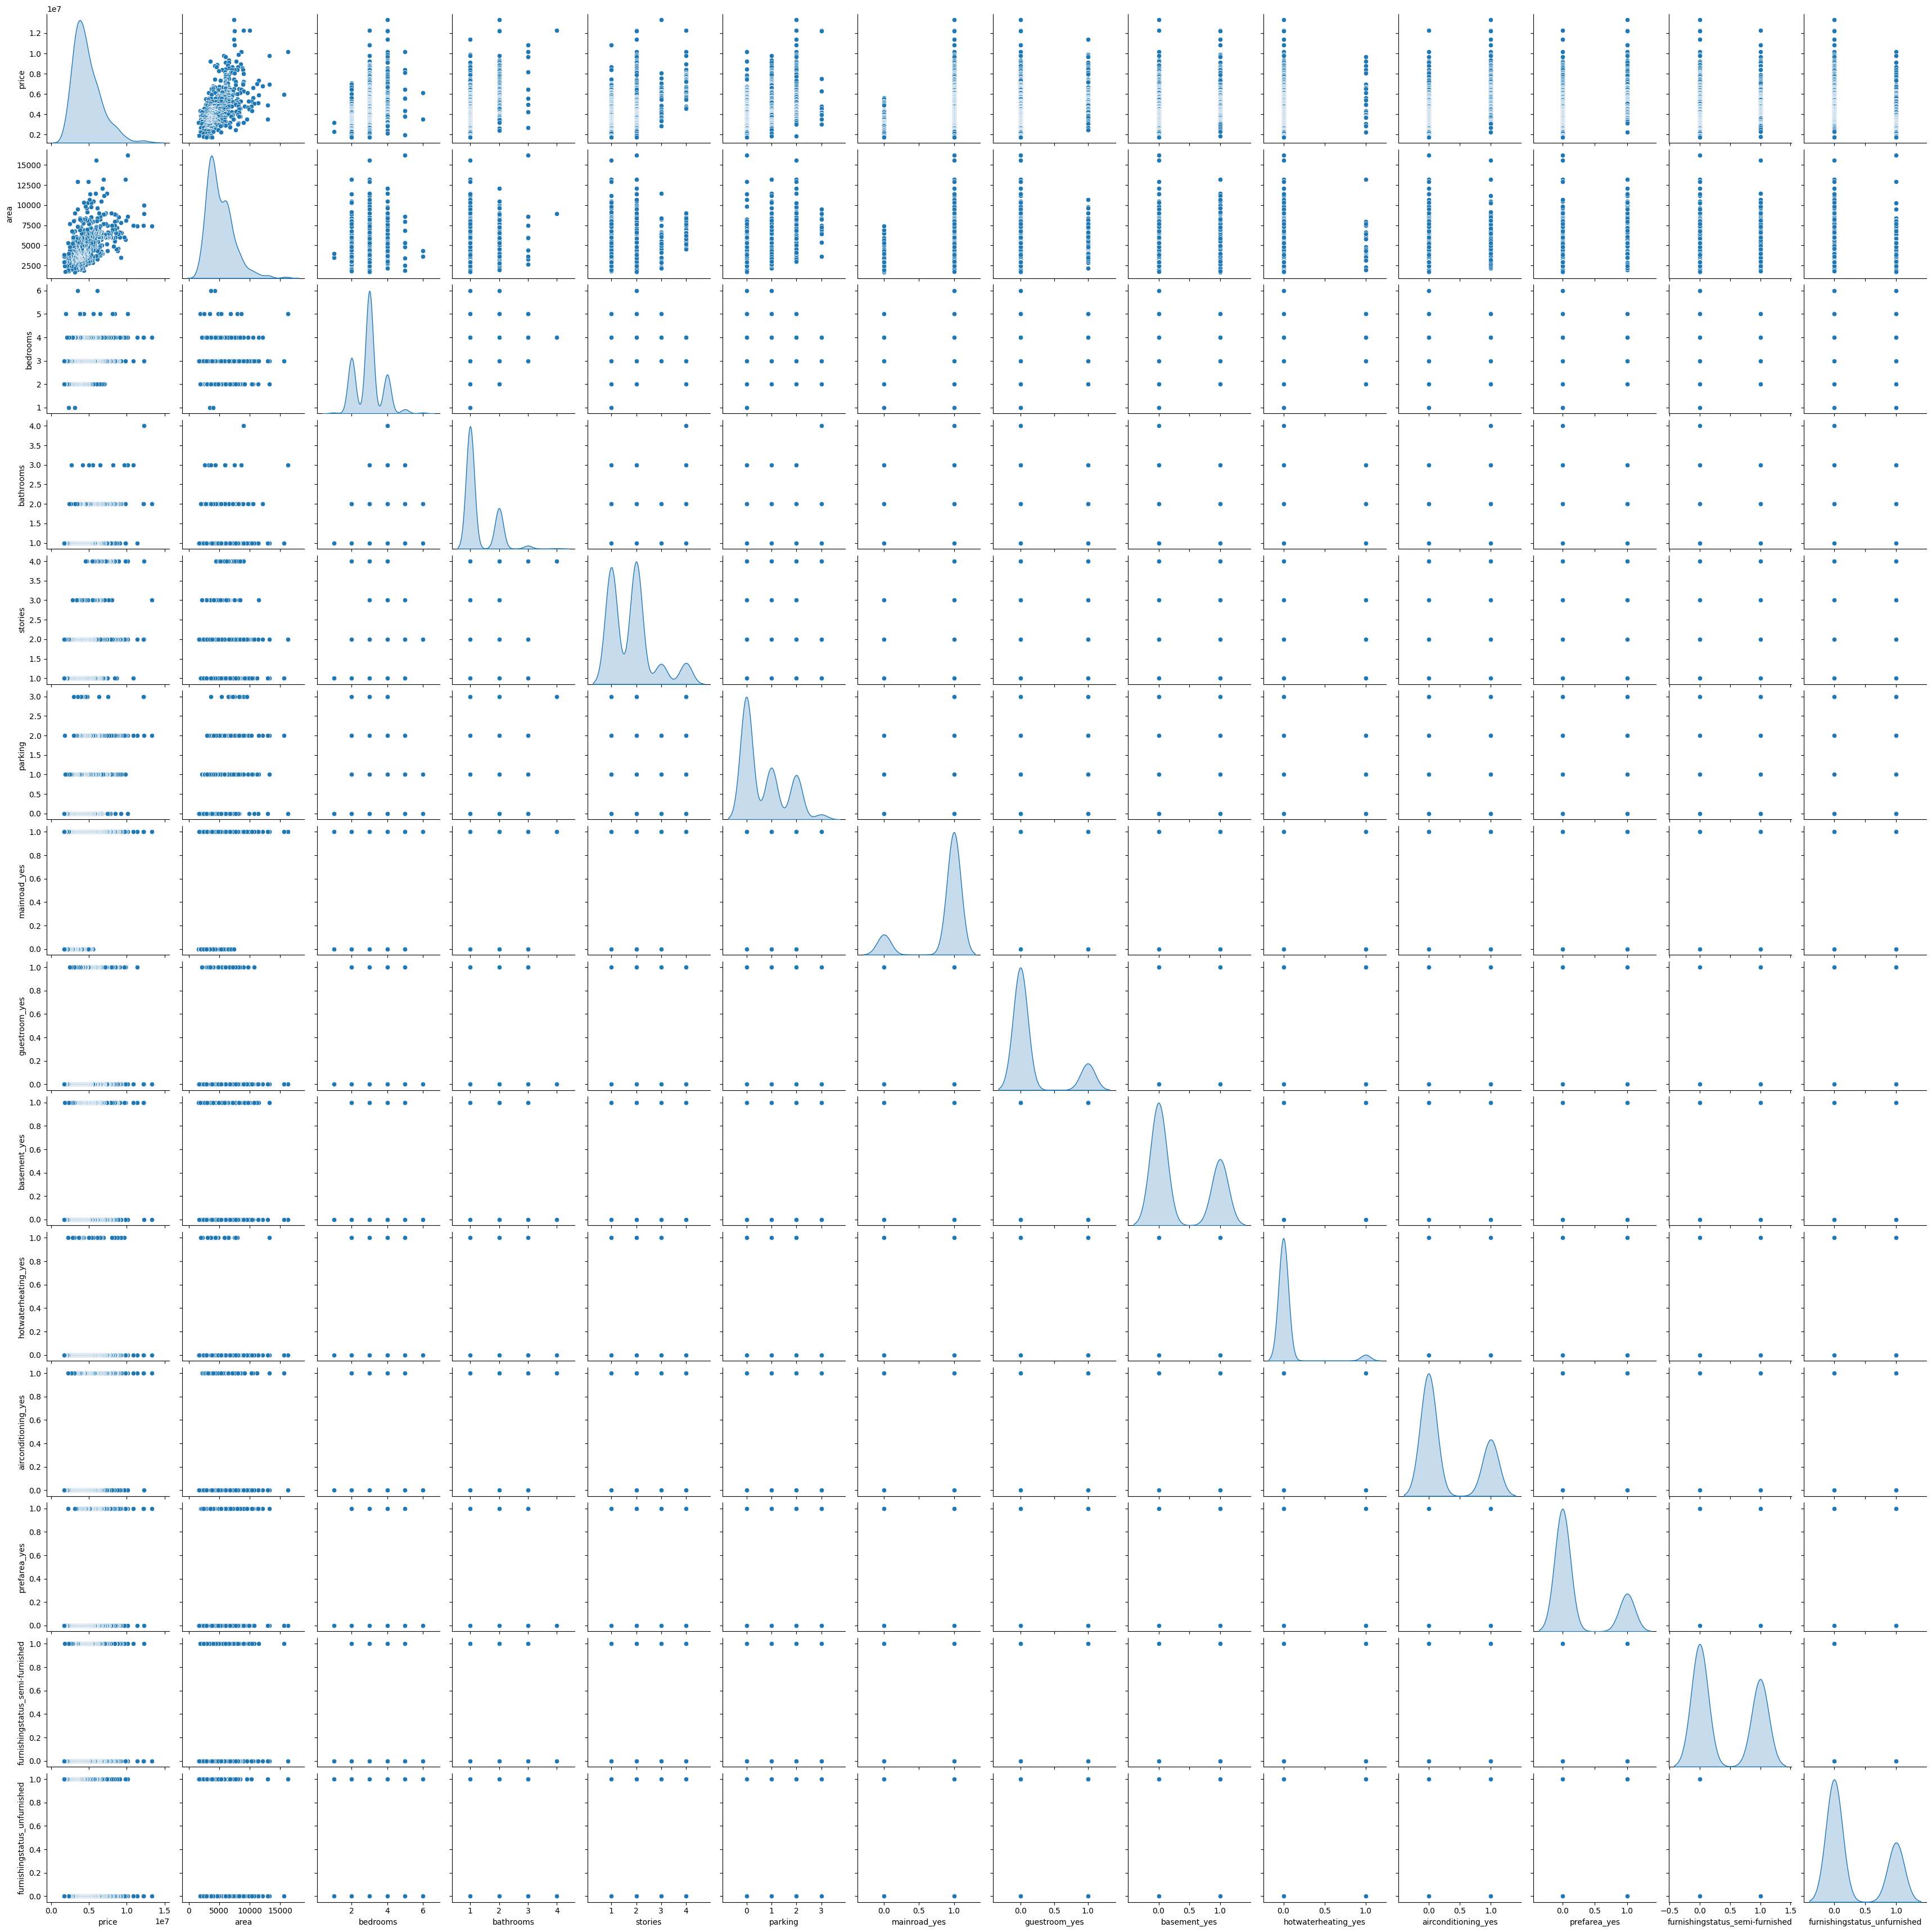

In [32]:
# EDA: Display summary statistics and visualize feature distributions
print(df.describe())

# Visualize the distribution of features
plt.figure(figsize=(12, 10))
for i, column in enumerate(X.columns):
    plt.subplot(4, 5, i+1)  # Adjust number of rows and columns based on the number of features
    sns.histplot(df[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

# Visualize pairwise relationships between features
sns.pairplot(df, diag_kind='kde')
plt.show()


### Feature Engineering

In [40]:
from sklearn.preprocessing import PolynomialFeatures

# Example feature engineering
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)

# Convert to DataFrame for better readability
X_poly_df = pd.DataFrame(X_poly, columns=poly.get_feature_names_out())

# Display the first few rows of the new feature set
print(X_poly_df.head())


     size  bedrooms  size bedrooms
0  1200.0       3.0         3600.0
1  1500.0       4.0         6000.0
2  1800.0       2.0         3600.0


### Hyperparameter Tuning

In [35]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize and perform GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           verbose=2)

grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
Best Score: 0.6176718294736261


### Cross-Validation

In [36]:
from sklearn.model_selection import cross_val_score

# Cross-Validation for Linear Regression
cv_scores_lr = cross_val_score(lr_model, X, y, cv=5, scoring='r2')
print("Linear Regression CV R² Scores:", cv_scores_lr)
print("Mean CV R² Score:", cv_scores_lr.mean())

# Cross-Validation for Random Forest
cv_scores_rf = cross_val_score(rf_model, X, y, cv=5, scoring='r2')
print("Random Forest CV R² Scores:", cv_scores_rf)
print("Mean CV R² Score:", cv_scores_rf.mean())


Linear Regression CV R² Scores: [-2.67844354e+11 -1.17390884e+05 -1.66761978e+05 -2.59066235e+04
 -1.27765771e+05]
Mean CV R² Score: -53568958368.84915
Random Forest CV R² Scores: [ -2.88611718  -7.99988093 -20.81055088 -16.28708716  -8.41706226]
Mean CV R² Score: -11.280139678687513
